In [1]:
import sys
sys.path.append('../package')
import lostark as lok
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/Users/user/Code_Files_Jupyter/nanum-all/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
font_name= fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
plt.rc('font', family="NanumBarunGothic")
pd.set_option('display.max_columns', None)

from scipy.stats import anderson
from scipy.stats import mannwhitneyu, ranksums

### 1. 딜러와 서폿간의 스펙 차이는 존재하는가?

In [111]:
supporter_list = ['바드', '도화가', '홀리나이트']

### 1.1. profile

In [101]:
profile_df = lok.get_table_df('profile_table')

In [ ]:
supporter_df = profile_df[profile_df['characterClassName'].isin(supporter_list)]
dealer_df = profile_df[~profile_df['characterClassName'].isin(supporter_list)]

### 1.1.1. Total skill point

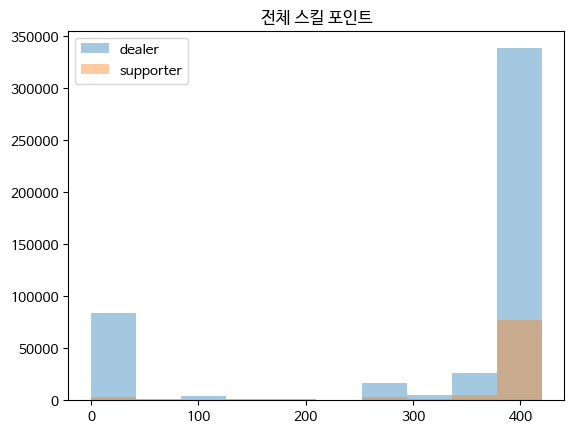

정규성 검정
 AndersonResult(statistic=93057.2932575565, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=327.6379305662049, scale=157.73382680216352)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

정규성을 만족하지 않음

MannwhitneyuResult(statistic=18880117421.5, pvalue=0.0)
RanksumsResult(statistic=-66.92801612473255, pvalue=0.0)
유의 수준 0.05일때 귀무가설을 기각하고 전체 스킬 포인트간의 차이가 존재한다를 채택한다.


In [86]:
column = 'totalSkillPoint'
supporter = supporter_df[column]
dealer = dealer_df[column]

plt.hist(dealer.values, label='dealer', alpha=0.4)
plt.hist(supporter.values, label='supporter', alpha=0.4)
plt.title("전체 스킬 포인트")
plt.legend()
plt.show()

print("정규성 검정\n", anderson(dealer))
print("\n정규성을 만족하지 않음\n")
print(mannwhitneyu(dealer, supporter))
print(ranksums(dealer, supporter))
print("유의 수준 0.05일때 귀무가설을 기각하고 전체 스킬 포인트간의 차이가 존재한다를 채택한다.")

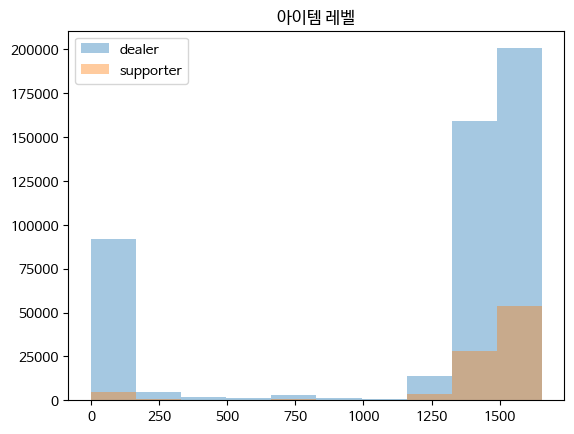

정규성 검정
 AndersonResult(statistic=82233.13292049384, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1180.851085255608, scale=596.5428230268786)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

정규성을 만족하지 않음

MannwhitneyuResult(statistic=16704403565.0, pvalue=0.0)
RanksumsResult(statistic=-114.57587715936317, pvalue=0.0)
유의 수준 0.05일때 귀무가설을 기각하고 아이템 레벨간의 차이가 존재한다를 채택한다.


In [85]:
column = 'itemMaxLevel'
supporter = supporter_df[column].astype(int)
dealer = dealer_df[column].astype(int)

plt.hist(dealer.values, label='dealer', alpha=0.4)
plt.hist(supporter.values, label='supporter', alpha=0.4)
plt.title("아이템 레벨")
plt.legend()
plt.show()

print("정규성 검정\n", anderson(dealer))
print("\n정규성을 만족하지 않음\n")
print(mannwhitneyu(dealer, supporter))
print(ranksums(dealer, supporter))
print("유의 수준 0.05일때 귀무가설을 기각하고 아이템 레벨간의 차이가 존재한다를 채택한다.")

### 1.2. accessory

In [12]:
accessories = ['목걸이', '귀걸이1', '귀걸이2', '반지1', '반지2']

In [96]:
accessory_df = lok.get_table_df('accessory_table')

In [102]:
df = pd.merge(profile_df, accessory_df, on='characterCode', how='inner')
df.head(2)

,characterCode,expeditionLevel,pvpGradeName,townLevel,title,guildMemberGrade,guildName,usingSkillPoint,totalSkillPoint,지성,담력,매력,친절,serverName,characterName,characterLevel,characterClassName,itemAvgLevel,itemMaxLevel,목걸이_grade,목걸이_name,목걸이_quality,목걸이_tier,목걸이_limitLevel,목걸이_availableTrade,목걸이_SAI,목걸이_HP,목걸이_치명,목걸이_특화,목걸이_신속,목걸이_제압,목걸이_인내,목걸이_숙련,목걸이_engraving1_name,목걸이_engraving1_point,목걸이_engraving2_name,목걸이_engraving2_point,목걸이_dengraving_name,목걸이_dengraving_point,목걸이_acquirablePlace,귀걸이1_grade,귀걸이1_name,귀걸이1_quality,귀걸이1_tier,귀걸이1_limitLevel,귀걸이1_availableTrade,귀걸이1_SAI,귀걸이1_HP,귀걸이1_치명,귀걸이1_특화,귀걸이1_신속,귀걸이1_제압,귀걸이1_인내,귀걸이1_숙련,귀걸이1_engraving1_name,귀걸이1_engraving1_point,귀걸이1_engraving2_name,귀걸이1_engraving2_point,귀걸이1_dengraving_name,귀걸이1_dengraving_point,귀걸이1_acquirablePlace,귀걸이2_grade,귀걸이2_name,귀걸이2_quality,귀걸이2_tier,귀걸이2_limitLevel,귀걸이2_availableTrade,귀걸이2_SAI,귀걸이2_HP,귀걸이2_치명,귀걸이2_특화,귀걸이2_신속,귀걸이2_제압,귀걸이2_인내,귀걸이2_숙련,귀걸이2_engraving1_name,귀걸이2_engraving1_point,귀걸이2_engraving2_name,귀걸이2_engraving2_point,귀걸이2_dengraving_name,귀걸이2_dengraving_point,귀걸이2_acquirablePlace,반지1_grade,반지1_name,반지1_quality,반지1_tier,반지1_limitLevel,반지1_availableTrade,반지1_SAI,반지1_HP,반지1_치명,반지1_특화,반지1_신속,반지1_제압,반지1_인내,반지1_숙련,반지1_engraving1_name,반지1_engraving1_point,반지1_engraving2_name,반지1_engraving2_point,반지1_dengraving_name,반지1_dengraving_point,반지1_acquirablePlace,반지2_grade,반지2_name,반지2_quality,반지2_tier,반지2_limitLevel,반지2_availableTrade,반지2_SAI,반지2_HP,반지2_치명,반지2_특화,반지2_신속,반지2_제압,반지2_인내,반지2_숙련,반지2_engraving1_name,반지2_engraving1_point,반지2_engraving2_name,반지2_engraving2_point,반지2_dengraving_name,반지2_dengraving_point,반지2_acquirablePlace,팔찌_grade,팔찌_name,팔찌_tier,팔찌_effect1,팔찌_effect2,팔찌_effect3,팔찌_effect4,팔찌_effect5,팔찌_canRerollNum,팔찌_canGivenNum,AS_grade,AS_name,AS_tier,AS_HP,AS_BHP,AS_engraving1_name,AS_engraving1_point,AS_engraving2_name,AS_engraving2_point,AS_dengraving_name,AS_dengraving_point,AS_setLevel
0,1,300,10단,70.0,None,일반 길드원,릴리움,416,420,656,693,604,553,실리안,그대는노란꽃의민들레다,60,스카우터,1385.00,1385.00,영웅,혼돈의 목걸이,76.0,3.0,1100.0,2.0,6554.0,2190.0,330.0,NaN,386.0,NaN,NaN,NaN,긴급구조,1.0,실드 관통,1.0,이동속도 감소,1.0,None,전설,추락한 영겁의 귀걸이,100.0,3.0,1100.0,3.0,5578.0,1659.0,270.0,NaN,NaN,NaN,NaN,NaN,에테르 포식자,2.0,저주받은 인형,2.0,공격력 감소,1.0,[어비스 레이드] 아르고스[어비스 던전] 오레하의 우물,영웅,금지된 공간의 귀걸이,89.0,3.0,1100.0,2.0,5097.0,1565.0,NaN,NaN,229.0,NaN,NaN,NaN,타격의 대가,2.0,선수필승,2.0,공격속도 감소,3.0,None,전설,빛나는 구도자의 반지,30.0,3.0,1100.0,3.0,5179.0,1327.0,145.0,NaN,NaN,NaN,NaN,NaN,중갑 착용,3.0,실드 관통,2.0,공격속도 감소,3.0,[가디언 토벌] 토벌 5단계,전설,추락한 혼돈의 반지,74.0,3.0,1100.0,3.0,5179.0,1327.0,167.0,NaN,NaN,NaN,NaN,NaN,전문의,3.0,분쇄의 주먹,2.0,공격속도 감소,2.0,[어비스 레이드] 아르고스[어비스 던전] 오레하의 우물,None,None,NaN,None,None,None,None,None,NaN,NaN,유물,고고한 정진의 돌,2.0,2554.0,0.0,원한,7.0,저주받은 인형,5.0,공격력 감소,5.0,0.0
1,3,117,초단,68.0,None,None,None,382,399,249,249,283,301,카제로스,붓쟁이김문어,59,도화가,1326.67,1326.67,영웅,즐거운 모험의 목걸이,100.0,3.0,NaN,NaN,6554.0,2190.0,250.0,NaN,250.0,NaN,NaN,NaN,중갑 착용,2.0,None,NaN,None,NaN,None,영웅,즐거운 모험의 귀걸이,100.0,3.0,NaN,NaN,5097.0,1565.0,150.0,NaN,NaN,NaN,NaN,NaN,중갑 착용,2.0,None,NaN,None,NaN,None,영웅,즐거운 여정의 귀걸이,100.0,3.0,NaN,NaN,5097.0,1565.0,150.0,NaN,NaN,NaN,NaN,NaN,중갑 착용,2.0,None,NaN,None,NaN,None,영웅,즐거운 모험의 반지,100.0,3.0,NaN,NaN,4733.0,1252.0,NaN,NaN,105.0,NaN,NaN,NaN,중갑 착용,2.0,None,NaN,None,NaN,None,영웅,즐거운 여정의 반지,100.0,3.0,NaN,NaN,4733.0,1252.0,NaN,NaN,105.0,NaN,NaN,NaN,중갑 착용,2.0,None,NaN,None,NaN,None,None,None,NaN,None,None,None,None,None,NaN,NaN,전설,강력한 비상의 돌,3.0,12439.0,622.0,약자 무시,6.0,중갑 착용,6.0,이동속도 감소,4.0,0.0


In [112]:
supporter_df = df[df['characterClassName'].isin(supporter_list)]
dealer_df = df[~df['characterClassName'].isin(supporter_list)]

In [113]:
column = ['목걸이_quality', '귀걸이1_quality', '귀걸이2_quality', '반지1_quality', '반지2_quality']
supporter = supporter_df[column].sum(axis=1)
dealer = dealer_df[column].sum(axis=1)

정규성 검정

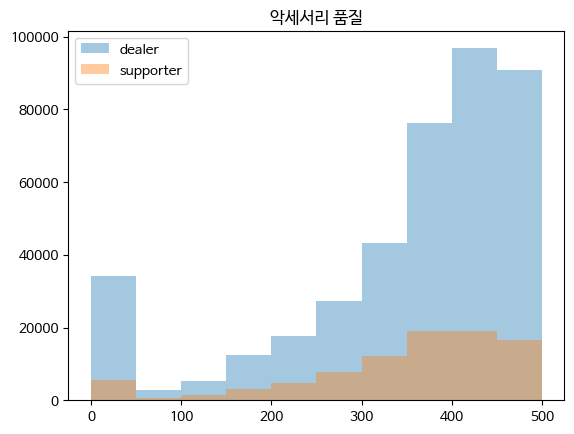

정규성 검정
 AndersonResult(statistic=21259.321433700505, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=348.6619850762027, scale=137.127730238925)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

정규성을 만족하지 않음

MannwhitneyuResult(statistic=19298435699.0, pvalue=1.8868204352564492e-136)
RanksumsResult(statistic=24.852918830225224, pvalue=2.4046549163344595e-136)
유의 수준 0.05일때 귀무가설을 기각하지 않는다. 품질의 차이는 존재한지 않는다.


In [114]:
plt.hist(dealer.values, label='dealer', alpha=0.4)
plt.hist(supporter.values, label='supporter', alpha=0.4)
plt.title("악세서리 품질")
plt.legend()
plt.show()

print("정규성 검정\n", anderson(dealer))
print("\n정규성을 만족하지 않음\n")
print(mannwhitneyu(dealer, supporter))
print(ranksums(dealer, supporter))
print("유의 수준 0.05일때 귀무가설을 기각하지 않는다. 품질의 차이는 존재한지 않는다.")